# **Project Name**    - Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project aims to analyze online retail transaction data to better understand customer purchasing behavior, segment customers based on their shopping patterns, and recommend similar products to enhance user experience.
We used Exploratory Data Analysis (EDA) to identify sales trends, top-selling products, and revenue distribution.
The RFM (Recency, Frequency, Monetary) model was applied to group customers into actionable clusters like High-Value, Regular, Occasional, and At-Risk using KMeans clustering.
Additionally, we implemented an item-based collaborative filtering recommendation system to suggest products similar to what customers are interested in.
The solution is integrated into a Streamlit dashboard, allowing interactive visualization, segmentation prediction, and product recommendation.

# **GitHub Link -**

[GitHub Link.](https://github.com/Alfiya-Simran/Shopper-Spectrum)

# **Problem Statement**


**The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.**

#### **Define Your Business Objective?**

- Identify and segment customers based on purchasing behavior to enable targeted marketing strategies.

- Improve customer retention by identifying at-risk customers and offering personalized offers.

- Increase revenue by cross-selling similar products through a recommendation engine.

- Provide a ready-to-use interactive dashboard for business teams to analyze customers and make data-driven decisions.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime as dt
from sklearn.metrics import silhouette_score
import pickle

### Dataset Loading

In [2]:
df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

### Dataset First View

In [3]:
# First View of Dataset
# Display first 5 rows
print("Dataset Preview:")
display(df.head())
# Dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
# Data types
print("\nColumn Data Types:")
print(df.dtypes)

Dataset Preview:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


Dataset contains 541909 rows and 8 columns

Column Data Types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


### Dataset Rows & Columns count

In [4]:
#Rows & Columns Count

print(f"🧾 Number of Rows: {df.shape[0]}")
print(f"🧾 Number of Columns: {df.shape[1]}")

🧾 Number of Rows: 541909
🧾 Number of Columns: 8


### Dataset Information

In [5]:
#Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [6]:
#Checking Duplicate Values

duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 5268


#### Missing Values/Null Values

In [7]:
# Missing Values / Null Values Count

print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# Basic statistical summary
print("\nStatistical Summary:")
display(df.describe())

# Check unusual records
negative_quantity = df[df['Quantity'] <= 0]
negative_price = df[df['UnitPrice'] <= 0]
print(f"\nRows with negative or zero quantity: {negative_quantity.shape[0]}")
print(f"Rows with negative or zero unit price: {negative_price.shape[0]}")


Statistical Summary:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



Rows with negative or zero quantity: 10624
Rows with negative or zero unit price: 2517


### What did you know about your dataset?

- The dataset contains 541,909 rows and 8 columns.

- Key numerical columns are Quantity and UnitPrice; others like InvoiceNo, StockCode, Description, CustomerID, and Country are categorical/object type.

- The CustomerID column has ~25% missing values, and Description has a few missing entries.

- There are duplicate rows and some records with negative quantities (likely returns) and zero or negative prices.

- The InvoiceDate column is in string format and will need parsing into a proper datetime type.

- The dataset records transactions for an online retail store, and analysis will focus on customer purchasing behavior.

## ***2. Data Preprocessing***

In [9]:
# Remove rows with missing CustomerID
df = df.dropna(subset=["CustomerID"])

In [10]:
# Exclude cancelled invoices (InvoiceNo starting with 'C')
df = df[~df["InvoiceNo"].str.startswith("C")]

In [11]:
# Remove negative or zero quantities and prices
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [12]:
print("Cleaned dataset shape:", df.shape)
df.head()

Cleaned dataset shape: (397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3. ***Exploratory Data Analysis (EDA)***

### Transaction Volume by Country

C:\Users\Admin\AppData\Local\Temp\ipykernel_21368\236400984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index[:10], y=country_sales.values[:10], palette="viridis")


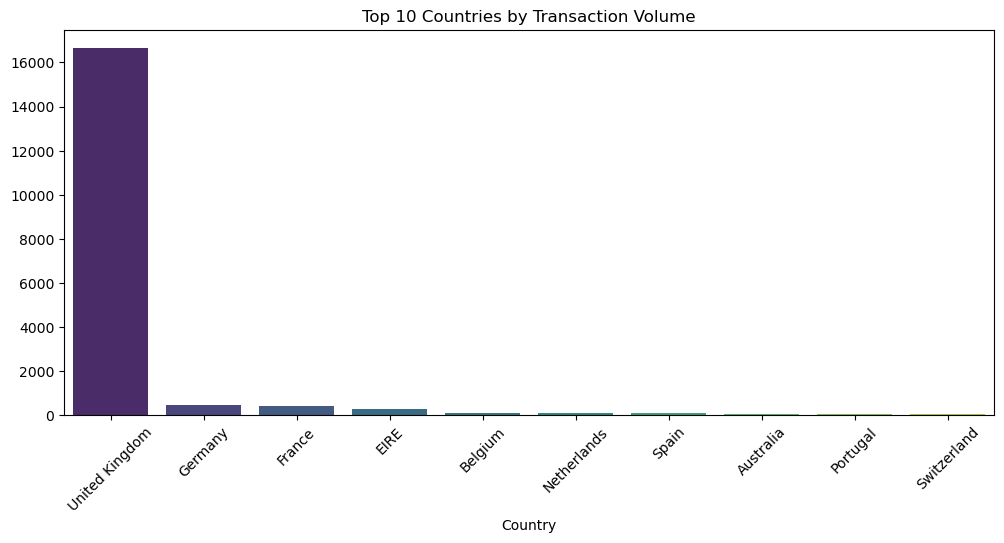

In [13]:
country_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=country_sales.index[:10], y=country_sales.values[:10], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Transaction Volume")
plt.show()

### Top-Selling Products

C:\Users\Admin\AppData\Local\Temp\ipykernel_21368\3559798024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="mako")


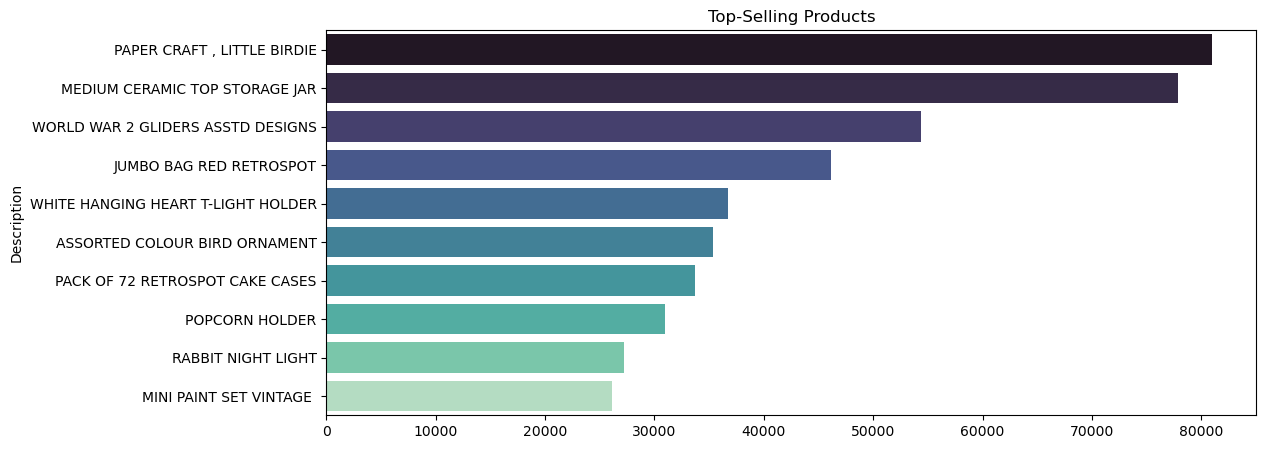

In [14]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="mako")
plt.title("Top-Selling Products")
plt.show()

### Purchase Trends Over Time

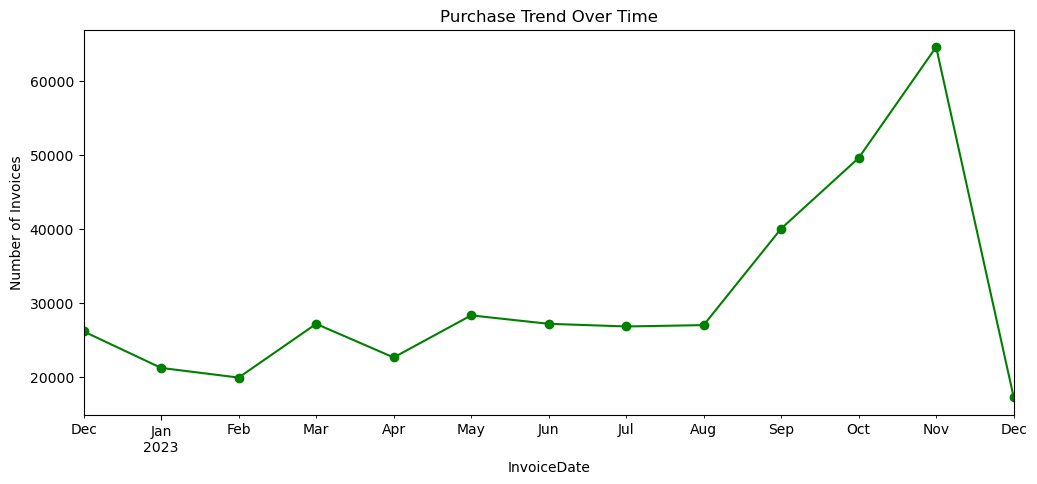

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
sales_trend = df.groupby(df['InvoiceDate'].dt.to_period('M'))['InvoiceNo'].count()
sales_trend.plot(kind='line', figsize=(12,5), marker='o', color='green')
plt.title("Purchase Trend Over Time")
plt.ylabel("Number of Invoices")
plt.show()

### Monetary Distribution per Transaction & Customer

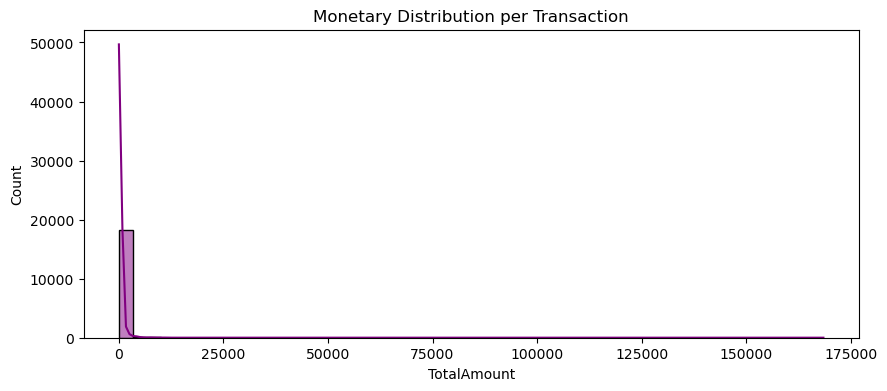

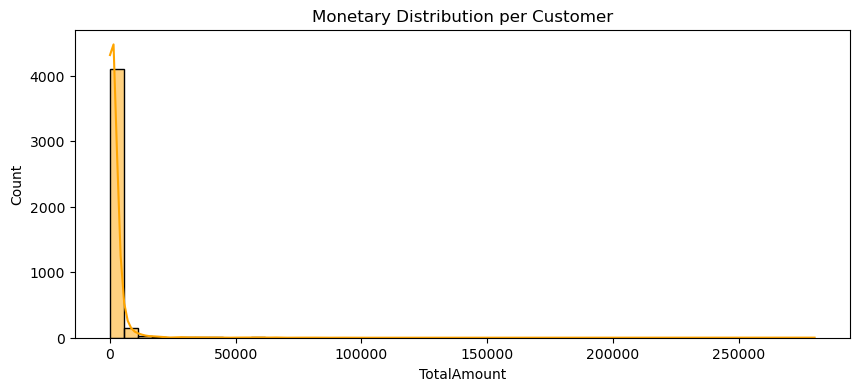

In [16]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Per Transaction
plt.figure(figsize=(10,4))
sns.histplot(df.groupby('InvoiceNo')['TotalAmount'].sum(), bins=50, kde=True, color='purple')
plt.title("Monetary Distribution per Transaction")
plt.show()

# Per Customer
plt.figure(figsize=(10,4))
sns.histplot(df.groupby('CustomerID')['TotalAmount'].sum(), bins=50, kde=True, color='orange')
plt.title("Monetary Distribution per Customer")
plt.show()

### RFM Analysis Distributions

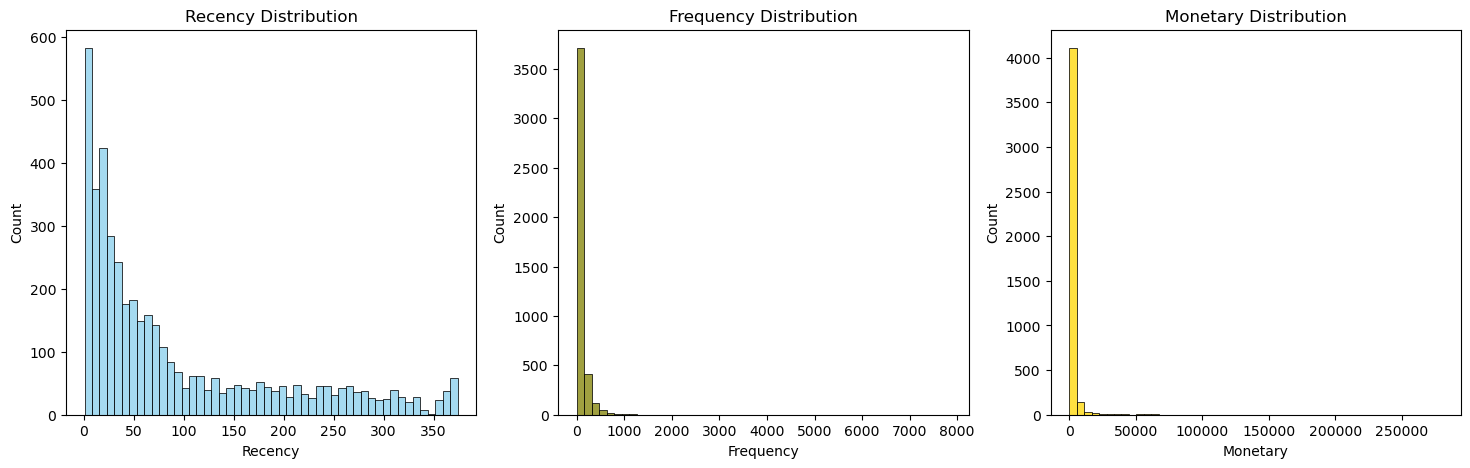

In [17]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
}).rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'Monetary'})

fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(rfm['Recency'], bins=50, ax=axes[0], color='skyblue')
sns.histplot(rfm['Frequency'], bins=50, ax=axes[1], color='olive')
sns.histplot(rfm['Monetary'], bins=50, ax=axes[2], color='gold')
axes[0].set_title("Recency Distribution")
axes[1].set_title("Frequency Distribution")
axes[2].set_title("Monetary Distribution")
plt.show()


### Elbow Curve for Cluster Selection

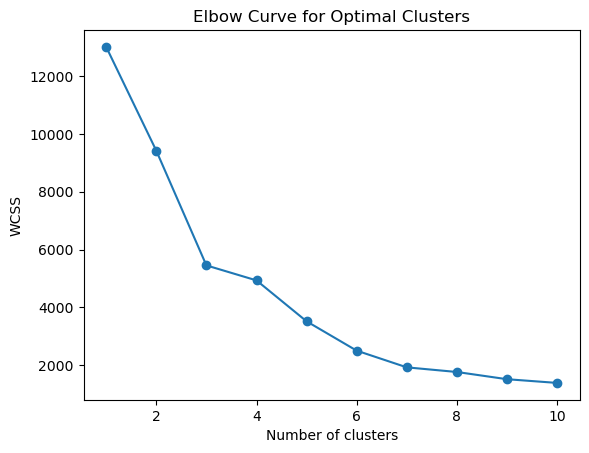

In [18]:
rfm_scaled = StandardScaler().fit_transform(rfm)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Curve for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


### Customer Cluster Profiles

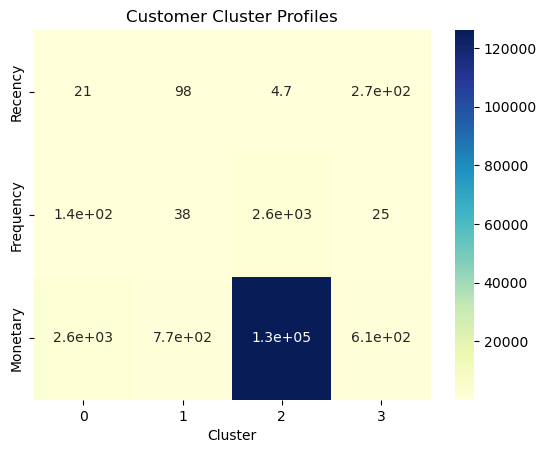

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_profile = rfm.groupby('Cluster').mean()
sns.heatmap(cluster_profile.T, annot=True, cmap="YlGnBu")
plt.title("Customer Cluster Profiles")
plt.show()

### Product Recommendation Heatmap (Similarity Matrix)

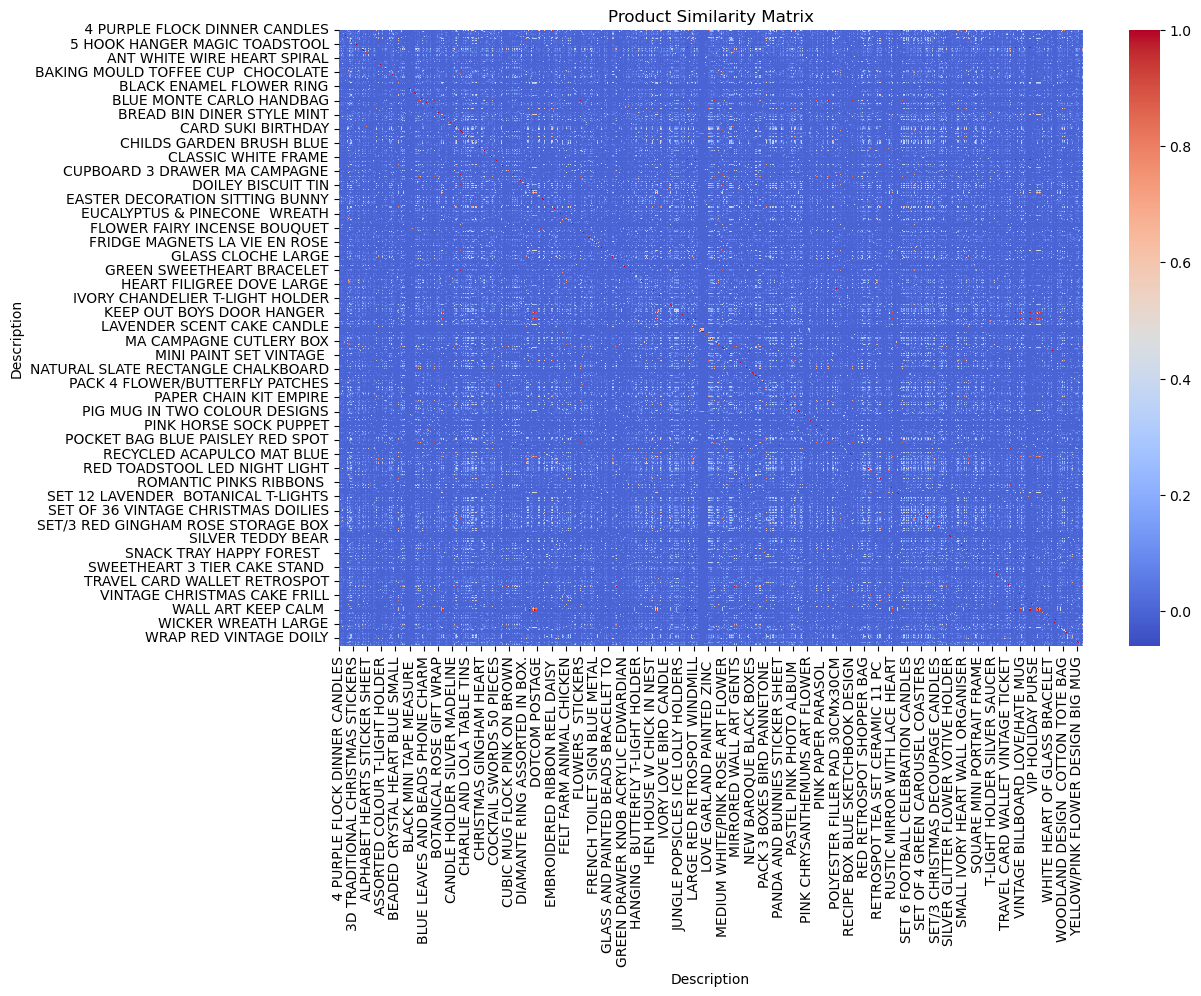

In [20]:
pivot_table = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)
corr_matrix = pivot_table.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Product Similarity Matrix")
plt.show()

## ***4.Clustering Methodology:***

### Feature Engineering (RFM)

In [21]:
# Snapshot date = one day after last purchase
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                   # Frequency
    'TotalAmount': 'sum'                                    # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'})

print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


### Standardize the RFM values

In [22]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

### Elbow Method & Silhouette Score

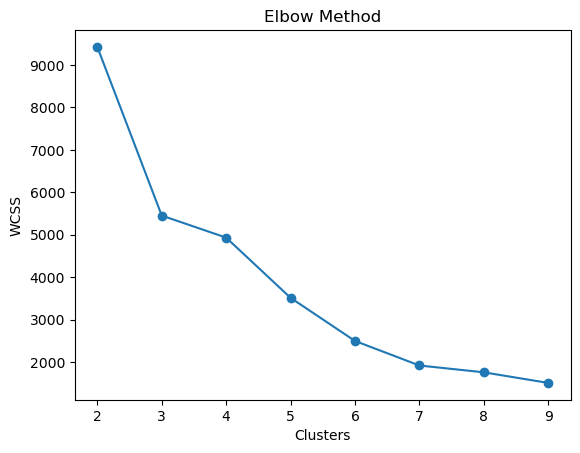

Silhouette Score for 3 clusters: 0.6019775931686978
Silhouette Score for 4 clusters: 0.3588023011776161
Silhouette Score for 5 clusters: 0.3599790938322134
Silhouette Score for 6 clusters: 0.5133606176751524


In [23]:
# Elbow method
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

# Example: Silhouette score for 3 to 6 clusters
for n in range(3, 7):
    km = KMeans(n_clusters=n, random_state=42).fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, km.labels_)
    print(f"Silhouette Score for {n} clusters: {score}")


### Fit Final Model (Assume 4 Clusters)

In [24]:
final_kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = final_kmeans.fit_predict(rfm_scaled)
rfm.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,20.990788,135.285122,2645.818172
1,98.218703,37.719457,773.877083
2,4.692308,2565.307692,126118.310000
3,272.407005,25.138889,605.842525


### Label Clusters Based on RFM

In [25]:
def segment(row):
    if row['Cluster'] == 0:
        return "High-Value"
    elif row['Cluster'] == 1:
        return "Regular"
    elif row['Cluster'] == 2:
        return "Occasional"
    else:
        return "At-Risk"

rfm['Segment'] = rfm.apply(segment, axis=1)
print(rfm['Segment'].value_counts())

Segment
High-Value    2171
Regular       1326
At-Risk        828
Occasional      13
Name: count, dtype: int64


### Visualize Clusters (3D Plot)

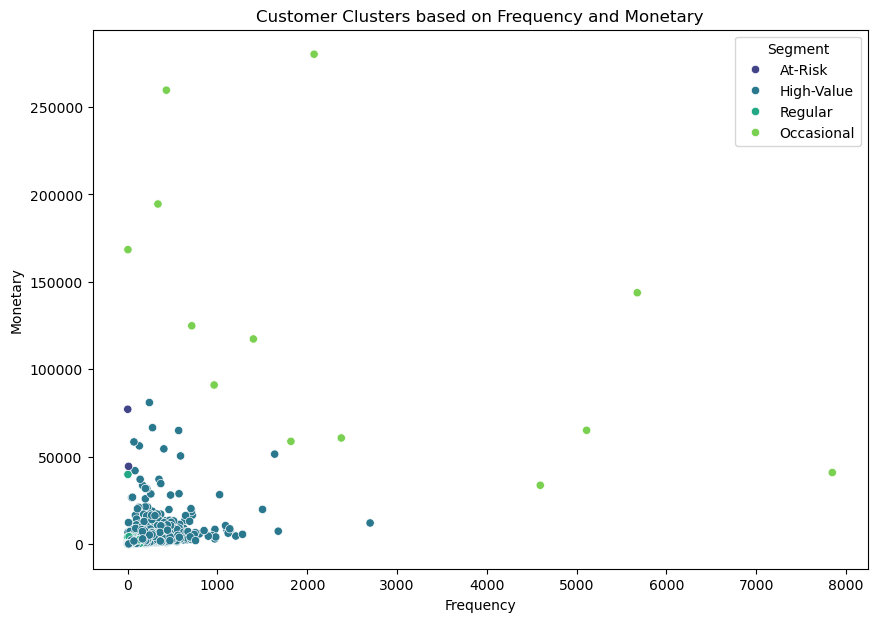

In [26]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='viridis')
plt.title("Customer Clusters based on Frequency and Monetary")
plt.show()

### Save Model for Streamlit

In [ ]:
recency = (df['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
monetary = df.groupby('CustomerID')['TotalAmount'].sum()

rfm = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})
rfm = rfm.fillna(0)

# --- Scaling ---
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# --- KMeans Clustering ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Save model & scaler
with open("rfm_clustering_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("rfm_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Create customer-product matrix
basket = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Compute cosine similarity
similarity_matrix = cosine_similarity(basket.T)
similarity_df = pd.DataFrame(similarity_matrix, index=basket.columns, columns=basket.columns)

# Build dictionary for recommendations
product_similarity = {}
for product in similarity_df.columns:
    sims = similarity_df[product].sort_values(ascending=False)
    product_similarity[product.upper()] = sims.to_dict()

# Save similarity dict
with open("product_similarity.pkl", "wb") as f:
    pickle.dump(product_similarity, f)


In [ ]:
with open("customer_segmentation.pkl", "wb") as f:
    pickle.dump(final_kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# **Conclusion**

The analysis revealed four major customer segments: High-Value, Regular, Occasional, and At-Risk.
By targeting High-Value customers with loyalty programs and re-engaging At-Risk customers, businesses can optimize retention.
The recommendation engine enables better cross-selling, enhancing customer satisfaction and increasing revenue.
Overall, this solution supports data-driven marketing strategies and provides a practical tool for business teams.